In [1]:
import torch
import matplotlib.pyplot as plt
from src.experiments.conditioned.dataset.config import DatasetConfig
from src.experiments.conditioned.dataset.dataset import Dataset
from src.experiments.conditioned.cunet.config import ModelConfig
from src.experiments.conditioned.cunet.model import Model

In [30]:
dataset = Dataset(DatasetConfig(input_size=(128, 128), data_dir="./data/small/test", encoder_depth=4))

In [11]:
config = ModelConfig(start_channels=64)
model1 = Model(config, dropout=0.25)
ckpt = 'last'
_ = model1.cuda()
model1.load_ckpt(f'./outputs/cunet/lightning_logs/version_9/checkpoints/{ckpt}.ckpt')
# model2 = Model(config)
# _ = model2.cuda()
# model2.load_ckpt(f'./outputs/unet/lightning_logs/version_3/checkpoints/{ckpt}.ckpt')

2 64 64
64 128 128
192 64 64
128 256 256
384 128 128
256 512 512
768 256 256
512 1024 1024
1537 512 512


In [108]:
i = 45*20
i = int(len(dataset) / 2)

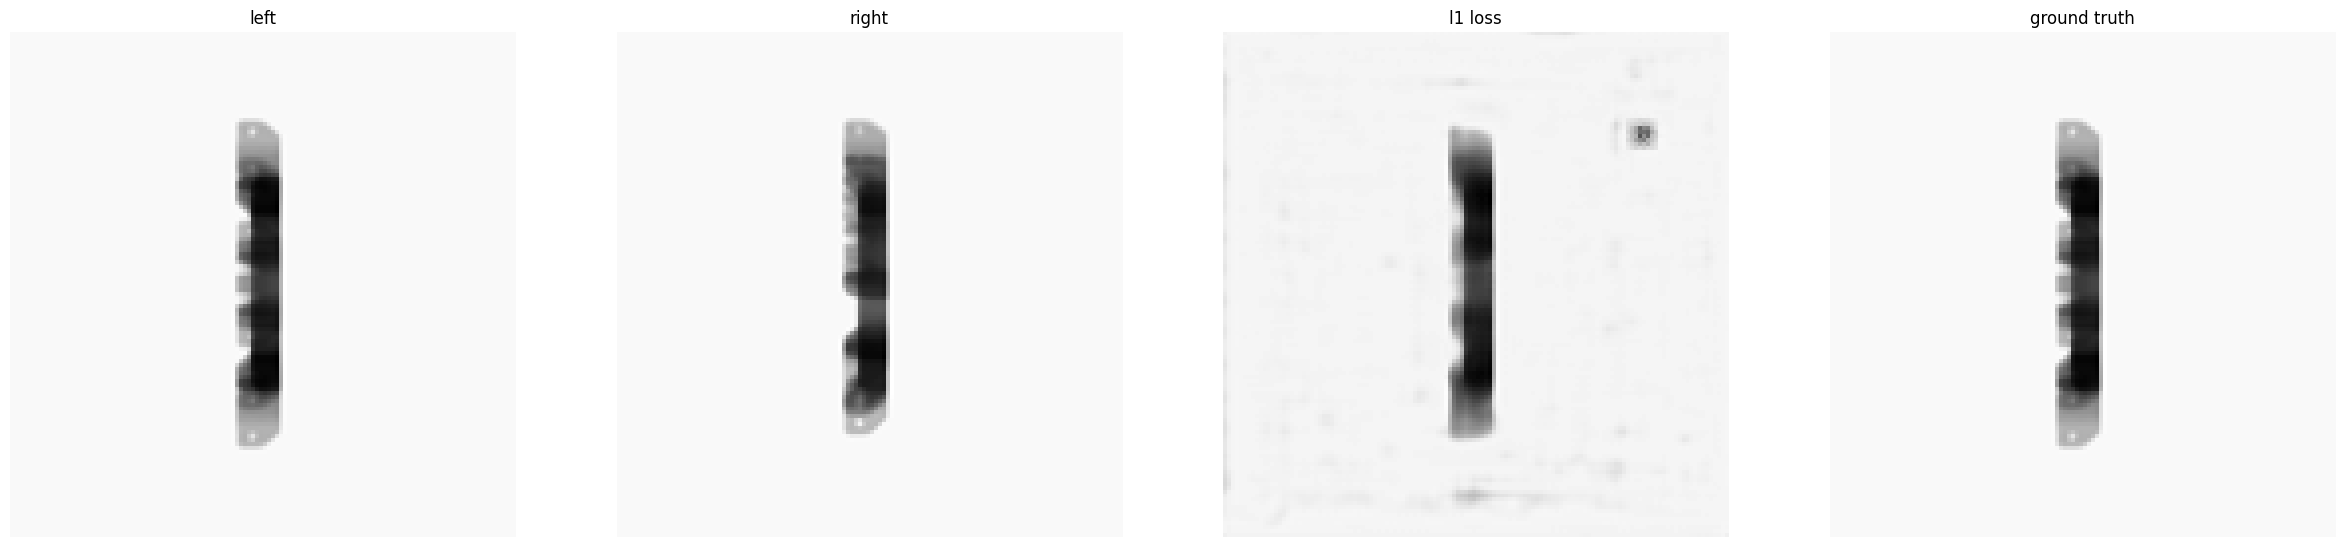

In [109]:
with torch.inference_mode():
    (x, z), y = dataset[i]
    y = y.numpy()[0]
    x = x.numpy()
    z = z.numpy()
    x_ = torch.tensor(x, device="cuda", requires_grad=False)[None, ...]
    z_ = torch.tensor(z, device="cuda", requires_grad=False)[None, ...]
    pred1 = model1(x_, z_).cpu().numpy()[0, 0]
    # pred2 = model2(x_).cpu().numpy()[0, 0]
imgs_title = [(x[0], "left"),
(x[1], "right"),
(pred1, "l1 loss"),
# (pred2, "l1 loss"),
(y, "ground truth")]
axs = plt.subplots(1, len(imgs_title), figsize=(30, 10))[1]
for ax, (img, title) in zip(axs, imgs_title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_axis_off()
i = (i + 10) % len(dataset)